# [ICTCOG] 4기 경북대 기본반

## 딥러닝 복습

> 책 추천: Dive into Deep Learning, Deep Learning 


In [1]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()
import pandas as pd
iris=pd.DataFrame(data.data, columns=data.feature_names)
iris['target']=data.target

In [5]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(iris.iloc[:,:-1],iris.target)
mlp.predict_proba([[3,3,3,3]])

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[0.00985185, 0.08965679, 0.90049136]])

### TensorFlow
- scikit-learn 보다 더 아양한 옵션을 줄 수 있음
- GPU 지원
#### Sequential
- 순차적으로 실행되어 간단한 모델만 만들 수 있음
참고: https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [6]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation='relu',input_shape=(4,)),
    #outputlayer 
    tf.keras.layers.Dense(3,activation='softmax'),

])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


### compile
학습전략
- loss
    - sparse_categorical_crossentropy
- optimizer
    - adam
- metrics
    - accuracy

### Loss function
- 가능도:  특정 사건이 일어날 가능성 비교
- log likelihood (로그 가능도)
    - cross entropy : classification 에서 실제값과 예측값관의 차이를 구하기 위해서 확률개념 도입 
    - $-\sigma y log \hat y$
    
### optimizer
- Gradient Descent: 반복해서 최저점으로 찾아 이동하는 최적화 알고리즘 
- $w=w-\alpha \frac{∂L}{∂w}$ 방항별로 가중치 업데이트
    - 기울기(step 방향)
    - 보폭(step size)

- backpropagation 가중치 업데이트

epoch 마다 batch size만큼 계속 반복해서 학습시키면서 가중치 업데이트 시켜서 loss function 최소화
- epoch 커질수록 성능 좋음

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc']) 

In [9]:
#매 epoch 당 5번 업데이트
model.fit(iris.iloc[:,:-1],iris.target ,epochs=5, batch_size=30)

Epoch 1/5
5/5 [==============================] - 0s 8ms/step - loss: 1.0473
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 0.9007
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 0.8222
Epoch 4/5
5/5 [==============================] - 0s 2ms/step - loss: 0.7751
Epoch 5/5
5/5 [==============================] - 0s 2ms/step - loss: 0.7258


- batch size: 몇개보고 weight update할지 사이즈 지정
- 1 epoch 당 5번 답 체크
- 총 50번 
- fit 은 새로 compile하기 전까지 계속 이어서 학습됨

In [10]:
#매 epoch 당 5번 업데이트
model.fit(iris.iloc[:,:-1],iris.target ,epochs=10, batch_size=30)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6924
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6625
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.6349
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6136
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5883
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5637
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5495
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5295
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5152
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4966


In [11]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

- mnist 우편번호의 숫자 손글씨 이미지 데이터 
- fashion_mnist 10가지 의류 분류

In [12]:
tf.keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [13]:
len(tf.keras.datasets.mnist.load_data())

2

4개 holdout

In [19]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

이미지 데이터 
- 컬러 채널이 없는 2차원: 흑백
- 컬러 채널이 있는 3차원: 컬러,흑백

In [ ]:
X_train.shape # 28x28 크기의 이미지 60,000개

In [21]:
import matplotlib.pyplot as plt

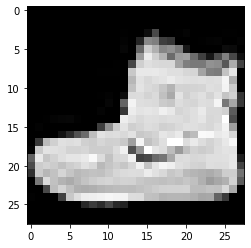

In [22]:
plt.imshow(X_train[0],cmap='gray') #color map 지정

- 이미지를 1차원으로 변경하면 머신러닝 가능

In [24]:
X_train=X_train.reshape(60000,-1)# (60,000 , 784)

- 10개 class 예측하는 모델

In [27]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc']) 

In [33]:
model.fit(X_train,y_train ,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.1368 - acc: 0.6837
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7337 - acc: 0.7320
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6447 - acc: 0.7732
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5838 - acc: 0.7918
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5394 - acc: 0.8068A: 3s - loss: 0.5856 - acc: 0 - ETA: 3s - loss: 0.5621 - acc: 0 - ETA: 3s - loss
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5148 - acc: 0.8222
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5012 - acc: 0.8275
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4905 - acc: 0.8324
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4869 - acc: 0.8348
Epoch 10/10
1875/1875 [========================

### 전처리
- 스케일링: 성능향상
- MinMaxScaler X-min/Max-min = x-0/255-0

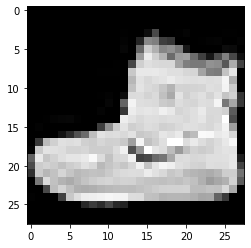

In [35]:
plt.imshow(X_train.reshape(-1,28,28)[0],cmap='gray') #color map 지정

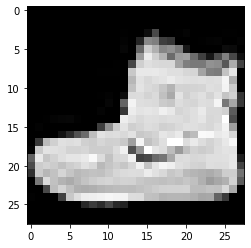

In [37]:
plt.imshow(X_train.reshape(-1,28,28)[0]/255,cmap='gray') #color map 지정

In [40]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
X_train=X_train/255
X_test=X_test/255
X_train=X_train.reshape(60000,-1)

In [41]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc']) 

model.fit(X_train,y_train ,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4997 - acc: 0.8232
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - acc: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - acc: 0.8765
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3146 - acc: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2974 - acc: 0.8902
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2814 - acc: 0.8972
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2684 - acc: 0.8995A: 3s - loss: 0.2549 - ETA: 3s - 
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2579 - acc: 0.9042
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2473 - acc: 0.9064
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2378 - acc: 0.9

이론과 별도로 가상의 레이어 제공

Flatten 
- reshape하지 않고 간편하게 사용
ravel
- view

- input_shape  첫 레이어에 지정

In [42]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
X_train=X_train/255
X_test=X_test/255

In [43]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc']) 

model.fit(X_train,y_train ,epochs=10) #전체 데이터 10번 업데이트

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5067 - acc: 0.8242
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3808 - acc: 0.8639
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3420 - acc: 0.8759
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3177 - acc: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2985 - acc: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2829 - acc: 0.8959
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2697 - acc: 0.8997
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2600 - acc: 0.9028A: 0s - loss: 0.2599 - acc: 0.902
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2503 - acc: 0.9066A: 2s - loss: 0.2445 -
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - l

In [44]:
model.evaluate(X_test,y_test) #scikit score 성능 측정과 동일

313/313 [==============================] - 0s 1ms/step - loss: 0.3393 - acc: 0.8810


[0.3392687737941742, 0.8809999823570251]

In [49]:
model.predict(X_train[3][tf.newaxis]) #softmax

array([[1.7176721e-02, 2.3380562e-05, 1.1645288e-05, 9.6801311e-01,
        3.7241577e-07, 2.6273088e-05, 1.4747210e-02, 3.2284852e-12,
        1.1374532e-06, 7.4545049e-08]], dtype=float32)

In [50]:
import numpy as np
np.argmax(model.predict(X_train[3][tf.newaxis]) ) #3번째값이 제일 큼

3

In [51]:
tf.argmax(model.predict(X_train[3][tf.newaxis]) ) #Tensor 값이 아니라서 

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

### Tensor
- 기본 데이터
- numpy, pandas 호환되도록 만듦
    - tensor -> numpy
    - numpy -> tensor (resource상대적으로 많이 필요
- GPU 사용
- immutable 
- Numpy, tensor 거의 유사함
    - Numpy에서 혼동되는 함수는 tensor에 없음

In [52]:
x=tf.constant([1,2,3]) #np.array
x

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [53]:
x.numpy()

array([1, 2, 3], dtype=int32)

In [54]:
np.add(x,3)

array([4, 5, 6], dtype=int32)

In [55]:
tf.add(np.array([1,2,3,]) ,3)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([4, 5, 6])>

### Tensor 연산
- universal funciton : scalar, vector, matrix

In [56]:
tf.add(1,2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [57]:
tf.add([1,2],[3,4])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [58]:
tf.reduce_sum([1,2,3])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [59]:
np.add.reduce([1,2,3])

6

연산자 오버로딩
- 연산자의 기능을 데이터 타입에따라 다르게 정의

In [60]:
tf.square(2)+tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=13>

In [61]:
tf.square([2,2])+tf.square([3,3])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([13, 13], dtype=int32)>

- 필수적 전처리
    - 결측치 처리
    - encoding
    
### Regression 
- 참고 :https://www.tensorflow.org/tutorials/keras/regression?hl=ko
- getutils 인터넷에서 다운로드 
- cache하여 2번째 부터는 빠르게 불러옴

In [63]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 6us/step


'/Users/MG/.keras/datasets/auto-mpg.data'

Name 변수 제거
- 속성으로 활용 불가

In [94]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [95]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [64]:
pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [102]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [103]:

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)



In [104]:
len(train_dataset.keys())

9

- 함수로 만들어서 재사용
- 마지막 레이어 node 1 
- loss MSE
###  MSE(평균제곱오차)
- 인자 넣을 피료 없이 기본 인자로 y_true, y_pred 들어감

In [127]:
'mse'
 tf.keras.losses.mean_squared_error#함수
tf.keras.losses.mse 
tf.keras.losses.MeanSquaredError #클래스
tf.keras.losses.MSE

True

In [112]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[9,]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) #output 1개
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [113]:
model=build_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.fit(
    normed_train_data, train_labels
)

10/10 [==============================] - 0s 3ms/step - loss: 579.3741 - mae: 22.8190 - mse: 579.3741


'mse' ,tf.keras.losses.mse 차이

In [115]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[9,]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) #output 1개
  ])

  model.compile(loss=tf.keras.losses.mse,
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [116]:
model=build_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.fit(
    normed_train_data, train_labels
)

10/10 [==============================] - 0s 2ms/step - loss: 578.1833 - mae: 22.7502 - mse: 578.1833


higher-order function

In [138]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[9,]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) #output 1개
  ])

  model.compile(loss=tf.keras.losses.MSE,
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mae', 'mse'])
  return model

In [139]:
model=build_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_64 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.fit(
    normed_train_data, train_labels
)

10/10 [==============================] - 0s 2ms/step - loss: 578.5438 - mae: 22.8029 - mse: 578.5438
